**Approach for Clustering Global Development Measurement**

**1. Import Modules and Read Data**


 Missing Value Handling (If applicable)

Type Casting(If applicable)

removing unncessary rows/columns (through missing value handling and correlation)

Handling Outliers

**3. EDA**

**4. Test the suitability of data for Clustering**

**5. Model Building
Hierarchical Clustering**

K Means Clustering

**5. Model Evaluation**

**6. Model Deployment**


In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.metrics import silhouette_score
import io
import warnings 
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving World_development_mesurement.xlsx to World_development_mesurement (1).xlsx


In [8]:
world=pd.read_excel("World_development_mesurement.xlsx")

In [9]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [10]:
world.describe(include ='all')

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2585.000000,1423,2.125000e+03,2704,1718.000000,185.000000,1.785000e+03,2494,2395.000000,2395,...,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2336,2233
unique,NaN,447,NaN,208,NaN,NaN,NaN,2494,NaN,1069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650,1457
top,NaN,44.1%,NaN,Algeria,NaN,NaN,NaN,"$54,790,058,957",NaN,$15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$80,000,000","$8,000,000"
freq,NaN,20,NaN,13,NaN,NaN,NaN,1,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,19
mean,0.022715,NaN,1.423071e+05,NaN,39.999418,94.875676,7.723684e+04,NaN,0.064170,NaN,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,NaN,NaN
std,0.011338,NaN,6.159288e+05,NaN,57.318588,54.791906,2.599239e+05,NaN,0.026325,NaN,...,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,NaN,NaN
min,0.007000,NaN,7.000000e+00,NaN,1.000000,1.000000,8.000000e+00,NaN,0.008000,NaN,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,NaN,NaN
25%,0.013000,NaN,1.360000e+03,NaN,13.000000,48.000000,3.737000e+03,NaN,0.046000,NaN,...,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,NaN,NaN
50%,0.020000,NaN,8.529000e+03,NaN,26.000000,94.000000,1.433800e+04,NaN,0.061000,NaN,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,NaN,NaN
75%,0.031000,NaN,5.910800e+04,NaN,45.000000,142.000000,4.185200e+04,NaN,0.079000,NaN,...,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,NaN,NaN


In [11]:
world.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [12]:
world.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [13]:
world.isna().sum()/world.shape[0]*100

Birth Rate                 4.400888
Business Tax Rate         47.374260
CO2 Emissions             21.412722
Country                    0.000000
Days to Start Business    36.464497
Ease of Business          93.158284
Energy Usage              33.986686
GDP                        7.766272
Health Exp % GDP          11.427515
Health Exp/Capita         11.427515
Hours to do Tax           47.633136
Infant Mortality Rate      9.615385
Internet Usage             6.397929
Lending Interest          30.473373
Life Expectancy Female     5.029586
Life Expectancy Male       5.029586
Mobile Phone Usage         6.176036
Number of Records          0.000000
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Population Total           0.000000
Population Urban           0.961538
Tourism Inbound           13.609467
Tourism Outbound          17.418639
dtype: float64

In [14]:
world_1= world.drop(columns=['Ease of Business','Number of Records'])

In [15]:
world_1

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",175.0,...,81.0,76.0,1.0,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,NaN,"$50,004,354,667",0.089,"$1,308",310.0,...,80.0,74.0,1.5,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,NaN,"$381,286,223,859",0.046,$593,792.0,...,78.0,72.0,1.0,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [16]:
col = ['Business Tax Rate','GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']
for i in col:
    world_1[i] = world_1[i].str.replace('$','')
    world_1[i] = world_1[i].str.replace('%','')
    world_1[i] = world_1[i].str.replace(',','')
    world_1[i] = world_1[i].astype('float')

In [17]:
world_1.describe(include ='all')

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2585.000000,1423.000000,2.125000e+03,2704,1718.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,...,2568.000000,2568.000000,2537.000000,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03
unique,NaN,NaN,NaN,208,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.022715,48.966901,1.423071e+05,NaN,39.999418,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,...,71.159268,66.461838,0.578124,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09
std,0.011338,40.954116,6.159288e+05,NaN,57.318588,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,...,10.708262,9.390217,0.474647,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10
min,0.007000,8.200000,7.000000e+00,NaN,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,39.000000,37.000000,0.000000,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,32.400000,1.360000e+03,NaN,13.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,...,64.000000,61.000000,0.100000,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08
50%,0.020000,41.000000,8.529000e+03,NaN,26.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,...,75.000000,69.000000,0.500000,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.031000,51.550000,5.910800e+04,NaN,45.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,...,79.000000,73.250000,0.900000,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09


<Axes: >

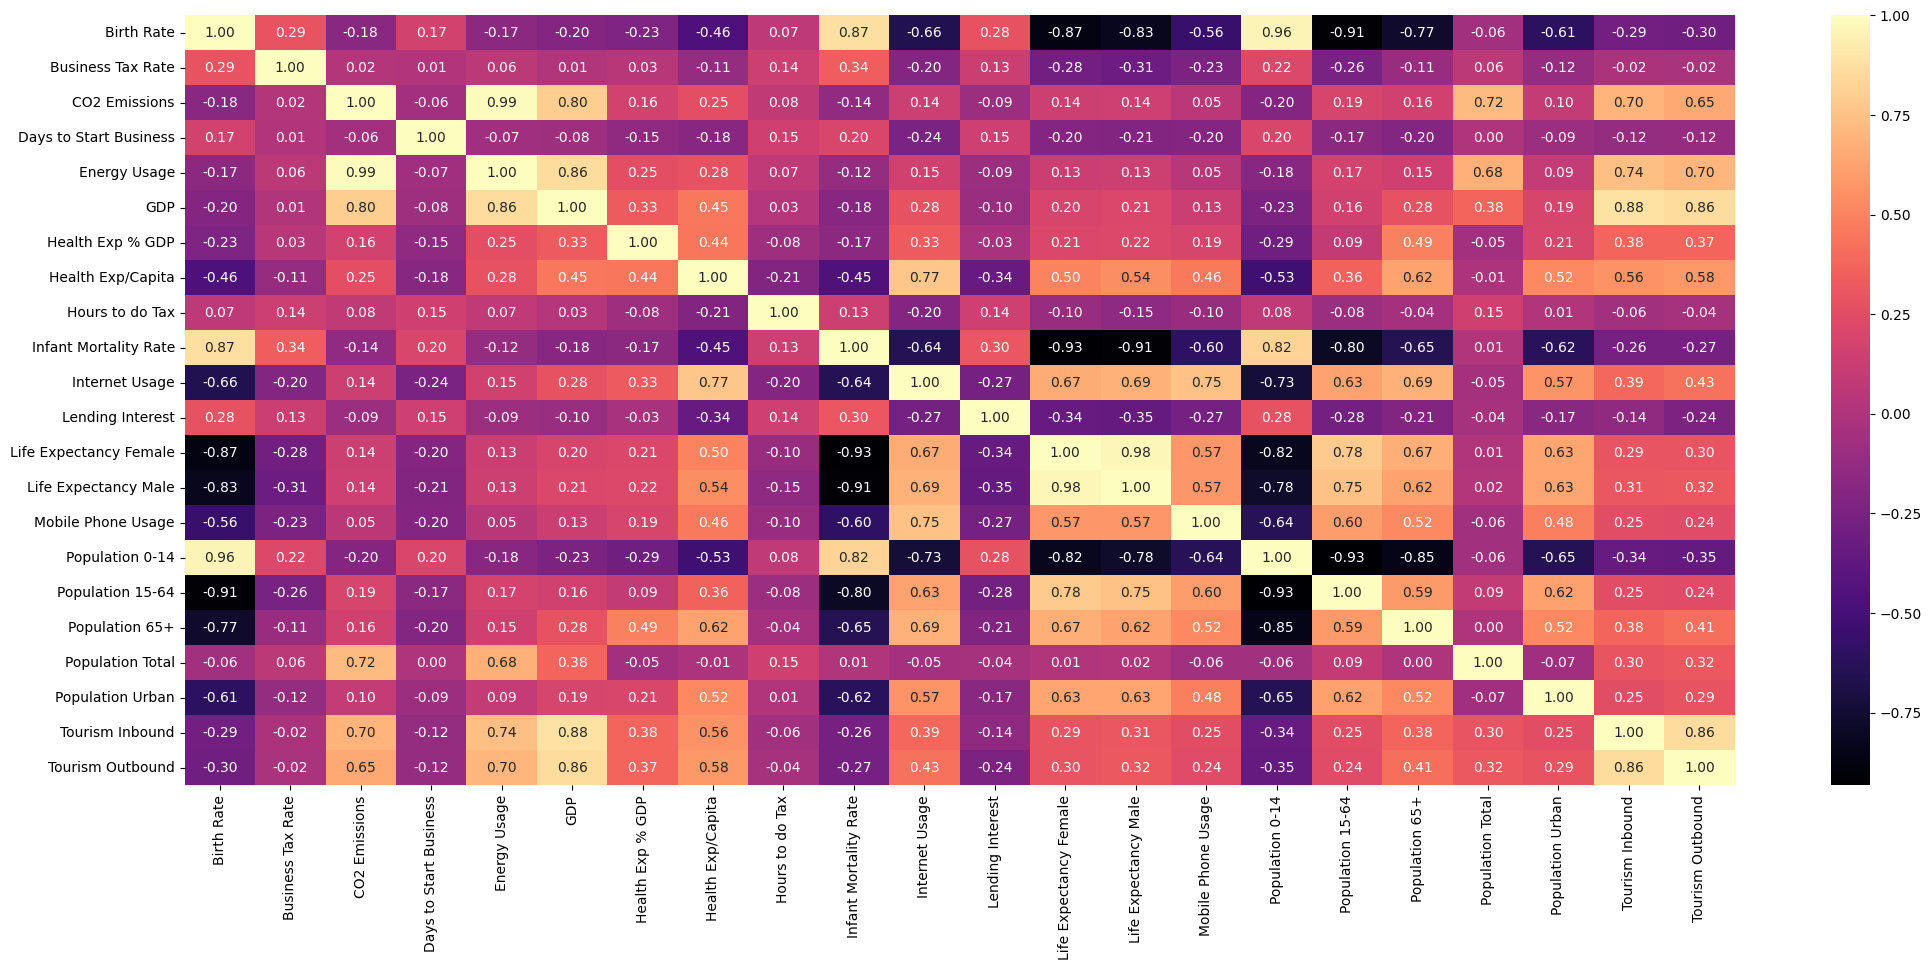

In [18]:
plt.figure(figsize=(25,10));
sns.heatmap(world_1.corr(),cmap='magma',annot=True,fmt=".2f")

In [19]:
world_1= world_1.drop(columns=['Business Tax Rate','Days to Start Business','Hours to do Tax','Lending Interest',])

<Axes: >

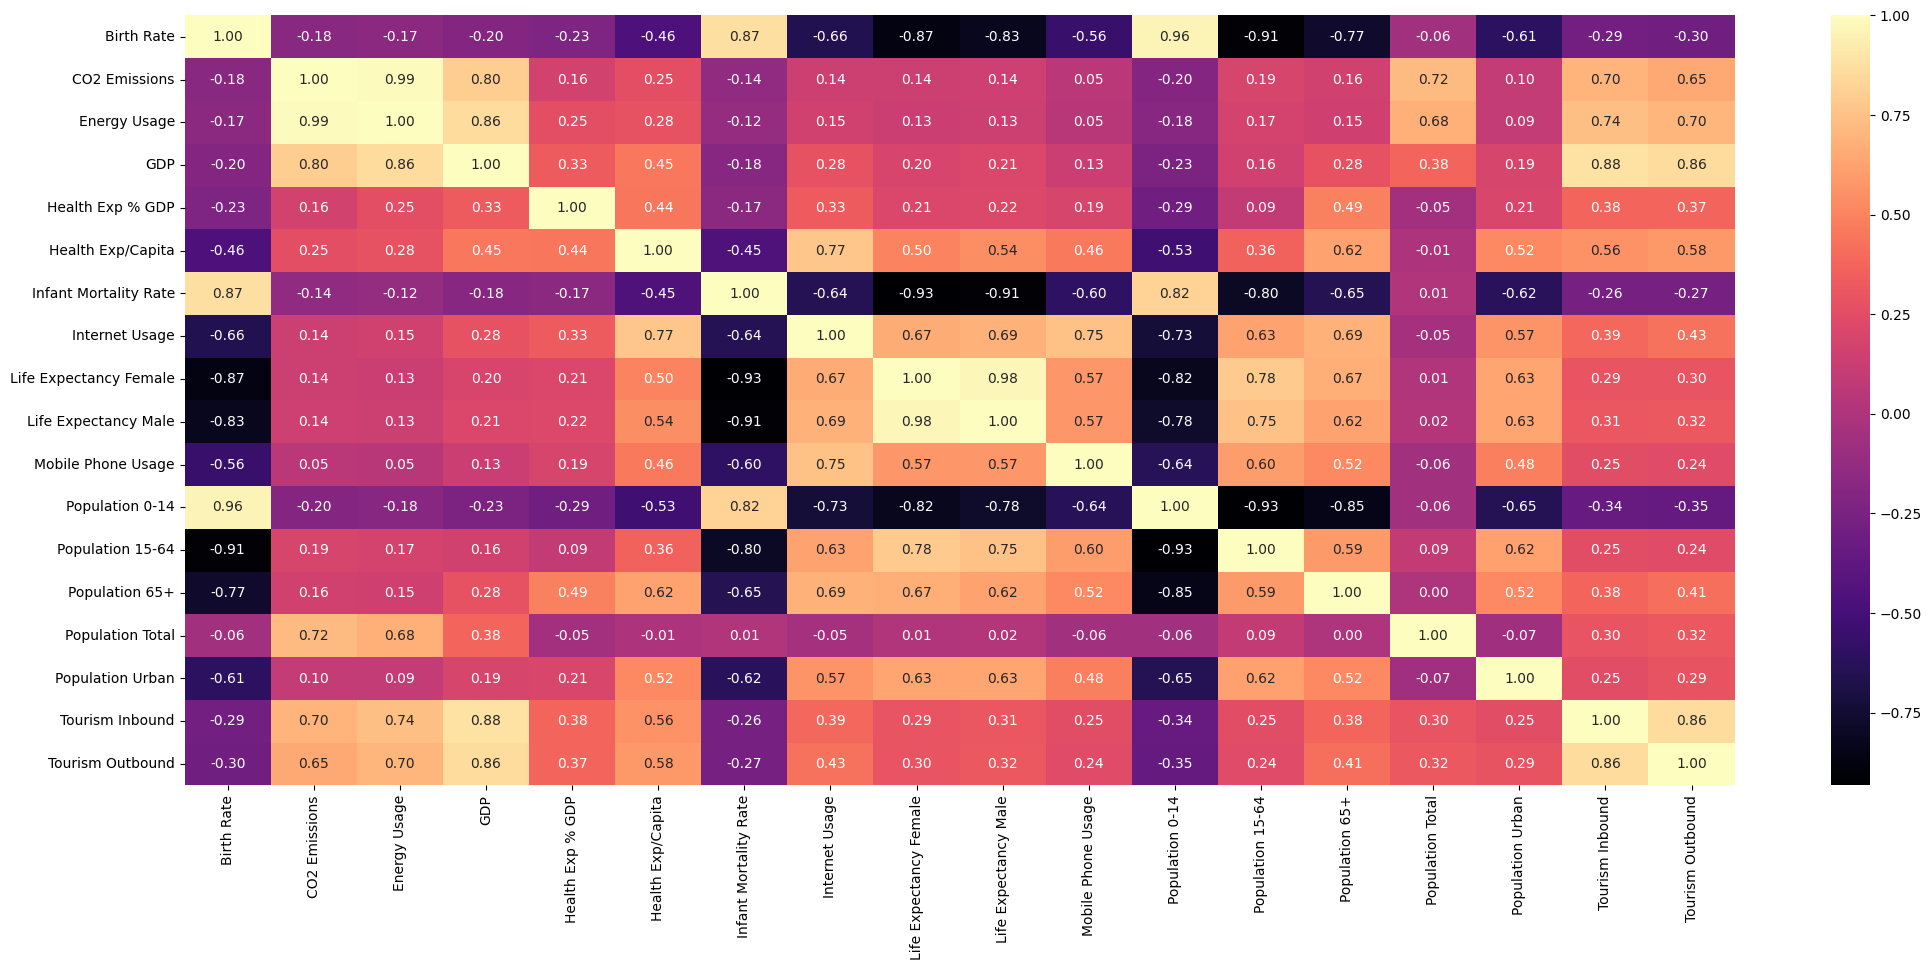

In [20]:
plt.figure(figsize=(25,10));
sns.heatmap(world_1.corr(),cmap='magma',annot=True,fmt=".2f")

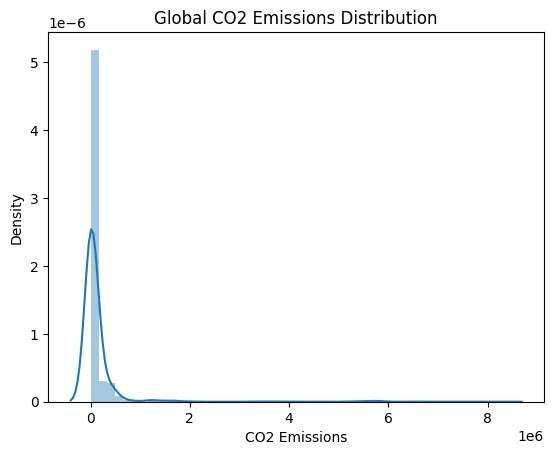

In [21]:
sns.distplot(world['CO2 Emissions'])
plt.title('Global CO2 Emissions Distribution')
plt.show()

# Comment:

The distribution of CO2 emissions rates is heavily skewed to the right, with the majority of countries having relatively low emissions and a few countries having very high emissions. Countries with higher levels of energy consumption and industrialization tend to have higher levels of CO2 emissions.

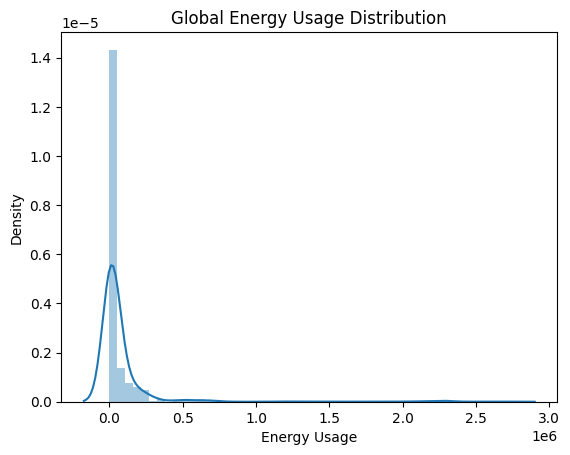

In [22]:
sns.distplot(world['Energy Usage'])
plt.title('Global Energy Usage Distribution')
plt.show()

# Comment:

The distribution of energy usage rates is heavily skewed to the right, with the majority of countries having relatively low energy usage and a few countries having very high energy usage.

The range of energy usage rates is quite large, spanning from less than 100 kilogrammes of oil equivalent (kgoe) per capita to over 10,000 kgoe per capita.

Countries with higher levels of economic development tend to have higher levels of energy usage.

Countries with a high proportion of industrial and manufacturing activities tend to have higher levels of energy usage.

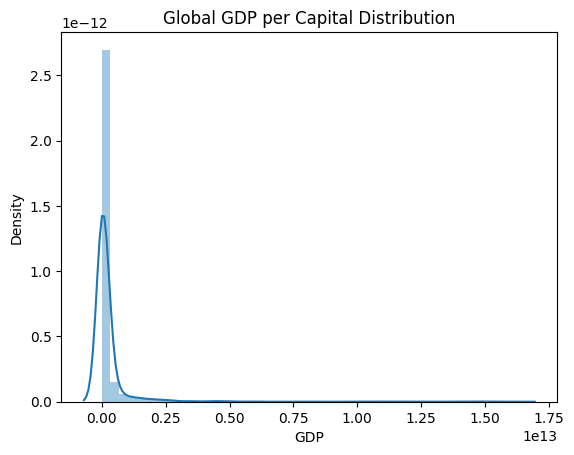

In [23]:
sns.distplot(world_1['GDP'])
plt.title('Global GDP per Capital Distribution')
plt.show()

# Comment:

The distribution of GDP per capita rates is also heavily skewed to the right, with the majority of countries having relatively low GDP and a few countries having very high GDP.

The range of GDP per capita rates is quite large, spanning from less than 500 dollars per capita to over 50,000 dollars per capita.

Countries with higher levels of economic development tend to have higher GDP per capita rates.

The plot suggests that there may be a bimodal distribution of GDP per capita rates, with a cluster of low-income countries and a cluster of high-income countries.

The plot also suggests that there may be some outliers in the dataset, with a few countries having very high GDP per capita rates compared to the rest of the sample

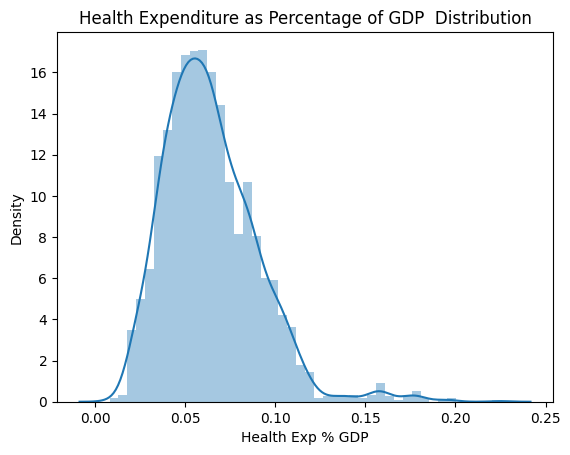

In [24]:
sns.distplot(world_1['Health Exp % GDP'])
plt.title('Health Expenditure as Percentage of GDP  Distribution')
plt.show()

# Comment:

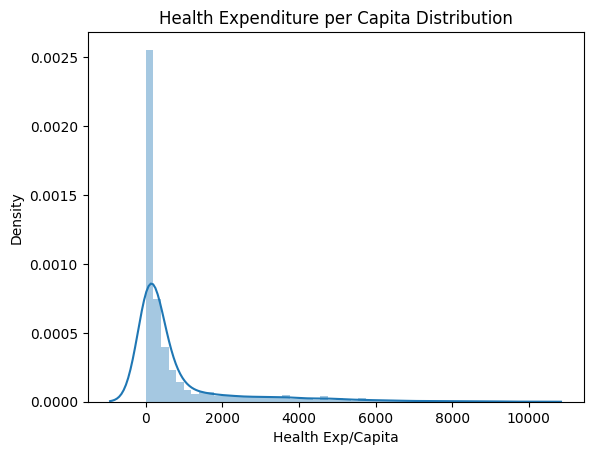

In [25]:
sns.distplot(world_1['Health Exp/Capita'])
plt.title('Health Expenditure per Capita Distribution')
plt.show()

# Comment:

The distribution of health expenditure per capita is skewed to the right, with the majority of countries having relatively low health expenditure per capita and a few countries having very high health expenditure per capita.

The range of health expenditure per capita rates is relatively wide, spanning from less than 50 dollar to over 10,000 dollar

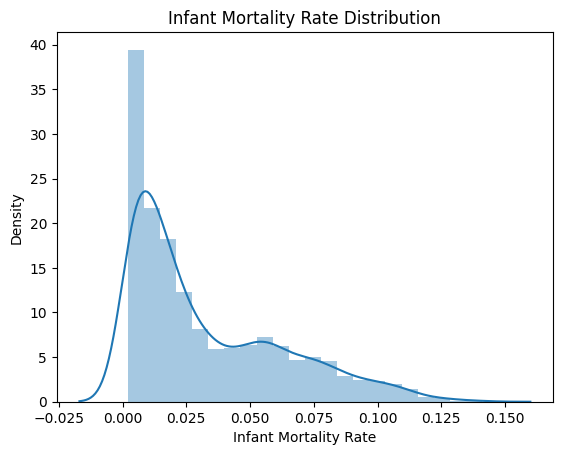

In [26]:
sns.distplot(world_1['Infant Mortality Rate'])
plt.title('Infant Mortality Rate Distribution')
plt.show()

# Comment:

The distribution of infant mortality rates is skewed to the right, with the majority of countries having relatively low infant mortality rates and a few countries having very high infant mortality rates.

The range of infant mortality rates is relatively wide, spanning from less than 1 per 1,000 live births to over 100 per 1,000 live births

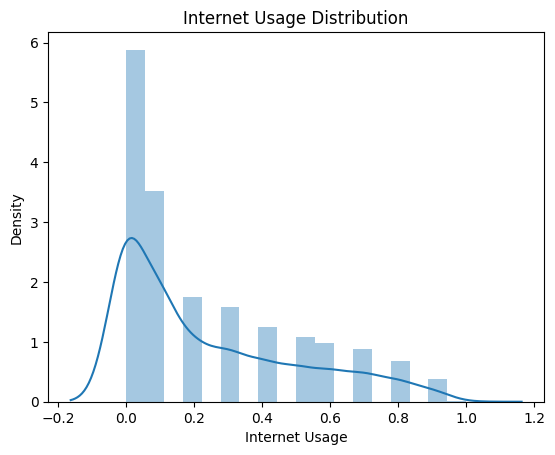

In [27]:
sns.distplot(world_1['Internet Usage'])
plt.title('Internet Usage Distribution')
plt.show()

# Comment:

The distribution of internet usage is right-skewed, with the majority of countries having internet usage rates between 0 and 50 percent.

There are a few countries with very high internet usage rates, with some countries having rates above 90 percent.

There may be some correlations between a country's level of economic development, its education system, and its internet usage rate. Further analysis would be necessary to explore these relationships more deeply.

Countries with lower internet usage rates may face barriers to accessing and utilizing digital technologies, which may have implications for their economic and social development

In [28]:
world_1 = world_1.set_index("Country")

In [29]:
world_1 = world_1.reset_index()
world_1

,Country,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Algeria,0.020,87931.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,Angola,0.050,9542.0,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,Benin,0.043,1617.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,Botswana,0.027,4276.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,Burkina Faso,0.046,1041.0,NaN,2.610959e+09,0.051,12.0,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,United States,0.013,NaN,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,81.0,76.0,1.0,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,Uruguay,0.015,NaN,NaN,5.000435e+10,0.089,1308.0,0.010,0.5,80.0,74.0,1.5,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,"Venezuela, RB",0.020,NaN,NaN,3.812862e+11,0.046,593.0,0.013,0.5,78.0,72.0,1.0,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [30]:
mean_df = world_1.groupby(['Country']).mean()
print(mean_df)

                       Birth Rate  CO2 Emissions  Energy Usage           GDP  \
Country                                                                        
Afghanistan              0.043154    2375.727273           NaN  9.718945e+09   
Albania                  0.014692    3902.090909   2024.583333  8.895522e+09   
Algeria                  0.022077  102837.636364  34042.166667  1.190391e+11   
American Samoa           0.020500            NaN           NaN           NaN   
Andorra                  0.010583     537.636364           NaN  2.268380e+09   
...                           ...            ...           ...           ...   
Vietnam                  0.016769   98764.272727  43263.750000  7.791354e+10   
Virgin Islands (U.S.)    0.013000            NaN           NaN           NaN   
Yemen, Rep.              0.034923   19319.090909   6517.833333  2.065261e+10   
Zambia                   0.043923    2046.363636   7262.250000  1.025046e+10   
Zimbabwe                 0.032000   1059

# Drop columns

we are drop Ease of business columns here because the null values in this columns are more than 50% . we also drop Number of Records columns here.

In [31]:
grouped_df = mean_df.reset_index()
grouped_df

,Country,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Afghanistan,0.043154,2375.727273,NaN,9.718945e+09,0.091909,30.636364,0.082769,0.016667,58.769231,56.384615,0.254545,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.060000e+08,8.240000e+07
1,Albania,0.014692,3902.090909,2024.583333,8.895522e+09,0.061462,168.846154,0.017769,0.192308,79.230769,73.000000,0.561538,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
2,Algeria,0.022077,102837.636364,34042.166667,1.190391e+11,0.038462,133.846154,0.027769,0.069231,71.615385,68.384615,0.492308,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
3,American Samoa,0.020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,5.752538e+04,0.880000,NaN,NaN
4,Andorra,0.010583,537.636364,NaN,2.268380e+09,0.063231,2394.461538,0.003000,0.516667,NaN,NaN,0.700000,NaN,NaN,NaN,7.668408e+04,0.897462,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.016769,98764.272727,43263.750000,7.791354e+10,0.060769,51.692308,0.023154,0.169231,79.538462,70.076923,0.546154,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09
204,Virgin Islands (U.S.),0.013000,NaN,NaN,NaN,NaN,NaN,NaN,0.292308,81.769231,75.538462,0.483333,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.259091e+09,NaN
205,"Yemen, Rep.",0.034923,19319.090909,6517.833333,2.065261e+10,0.048308,49.000000,0.054769,0.053846,63.076923,60.384615,0.215385,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08
206,Zambia,0.043923,2046.363636,7262.250000,1.025046e+10,0.063846,52.461538,0.075692,0.038462,49.692308,48.076923,0.207692,0.465769,0.507231,0.026846,1.190203e+07,0.370769,1.083846e+08,1.083846e+08


In [32]:
grouped_df.columns

Index(['Country', 'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Internet Usage', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [33]:
world_freatures=[ 'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Internet Usage', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound']

In [34]:
world_3 = grouped_df[world_freatures]

In [35]:
from sklearn.impute import KNNImputer
knn_impute = KNNImputer(n_neighbors=6,weights='distance')
k = knn_impute.fit_transform(grouped_df.iloc[:,1:])

In [36]:
df = pd.DataFrame(k,columns=world_freatures)


In [37]:
df

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.043154,2375.727273,19373.392939,9.718945e+09,0.091909,30.636364,0.082769,0.016667,58.769231,56.384615,0.254545,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.060000e+08,8.240000e+07
1,0.014692,3902.090909,2024.583333,8.895522e+09,0.061462,168.846154,0.017769,0.192308,79.230769,73.000000,0.561538,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
2,0.022077,102837.636364,34042.166667,1.190391e+11,0.038462,133.846154,0.027769,0.069231,71.615385,68.384615,0.492308,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
3,0.020500,506.725403,66.595546,1.552486e+09,0.096253,1012.218015,0.017465,0.503438,73.350053,68.299346,0.000000,0.292052,0.639553,0.068333,5.752538e+04,0.880000,2.452522e+08,1.097245e+08
4,0.010583,537.636364,14566.993748,2.268380e+09,0.063231,2394.461538,0.003000,0.516667,80.118801,74.070621,0.700000,0.236010,0.658249,0.105799,7.668408e+04,0.897462,6.796118e+08,1.473582e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.016769,98764.272727,43263.750000,7.791354e+10,0.060769,51.692308,0.023154,0.169231,79.538462,70.076923,0.546154,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09
204,0.013000,789.360495,8076.278491,2.193521e+09,0.055611,3126.643349,0.004346,0.292308,81.769231,75.538462,0.483333,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.259091e+09,6.480373e+08
205,0.034923,19319.090909,6517.833333,2.065261e+10,0.048308,49.000000,0.054769,0.053846,63.076923,60.384615,0.215385,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08
206,0.043923,2046.363636,7262.250000,1.025046e+10,0.063846,52.461538,0.075692,0.038462,49.692308,48.076923,0.207692,0.465769,0.507231,0.026846,1.190203e+07,0.370769,1.083846e+08,1.083846e+08


# Checking Suitability of dataset for clustering, Hopkins test

In [38]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [39]:
hopkins(df)

0.997682348557038

In [40]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [41]:
X_train_minmax = min_max_scaler.fit_transform(df)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=18)
pca_val = pca.fit_transform(X_train_minmax)
pca_val

array([[ 1.11866473e+00,  2.54391034e-01, -1.55350517e-02, ...,
        -3.10682007e-03,  3.00013354e-03, -1.80409128e-04],
       [-2.18703597e-01, -2.71083917e-01,  1.57231213e-01, ...,
        -7.21613212e-04, -7.70518364e-05,  2.57332430e-06],
       [ 6.89151028e-02, -2.68737340e-01, -6.06776026e-02, ...,
         9.09701756e-03, -1.10027051e-03,  5.24750401e-05],
       ...,
       [ 8.27938779e-01,  2.06664577e-02, -1.23993781e-02, ...,
        -5.41426222e-03, -1.82679146e-03,  1.42936945e-04],
       [ 1.15876175e+00,  2.78392165e-01, -9.69875874e-02, ...,
        -7.71119526e-04, -1.63451823e-03, -2.83505623e-04],
       [ 9.26987676e-01,  1.60917305e-01,  3.90511716e-02, ...,
        -2.44398791e-03,  1.01602889e-04,  7.38529289e-05]])

In [44]:
# The amount of variance that each PCA explains is 
variance=pca.explained_variance_ratio_
variance

array([6.59880973e-01, 7.83868567e-02, 6.23550072e-02, 4.77119541e-02,
       4.10121063e-02, 3.14060322e-02, 2.20859568e-02, 1.71886707e-02,
       1.37003897e-02, 9.00628070e-03, 7.97209667e-03, 3.75006763e-03,
       2.66668018e-03, 1.29672033e-03, 1.03457728e-03, 5.09482436e-04,
       3.60409732e-05, 1.07071584e-07])

In [45]:
cumulative_variance = np.cumsum(np.round(variance,4)*100)
cumulative_variance

array([ 65.99,  73.83,  80.07,  84.84,  88.94,  92.08,  94.29,  96.01,
        97.38,  98.28,  99.08,  99.46,  99.73,  99.86,  99.96, 100.01,
       100.01, 100.01])

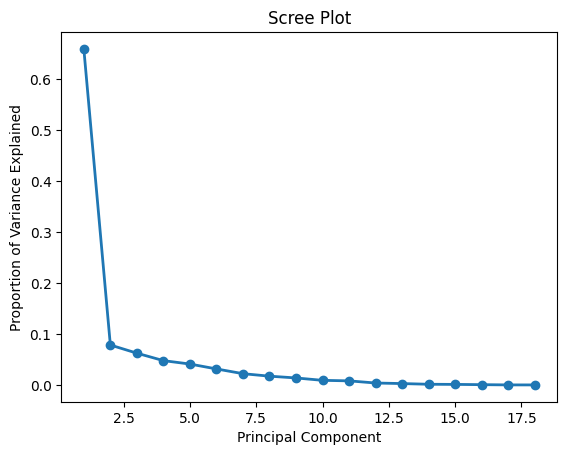

In [46]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

In [47]:
pca_df = pd.DataFrame(pca_val[:,:3],columns=['PC1','PC2','PC3'])
pca_df

,PC1,PC2,PC3
0,1.118665,0.254391,-0.015535
1,-0.218704,-0.271084,0.157231
2,0.068915,-0.268737,-0.060678
3,-0.210291,0.125364,-0.201730
4,-0.708467,0.036008,-0.207080
...,...,...,...
203,-0.063492,-0.305554,0.289728
204,-0.633445,-0.009301,-0.167977
205,0.827939,0.020666,-0.012399
206,1.158762,0.278392,-0.096988


# Hierarchical Clustering

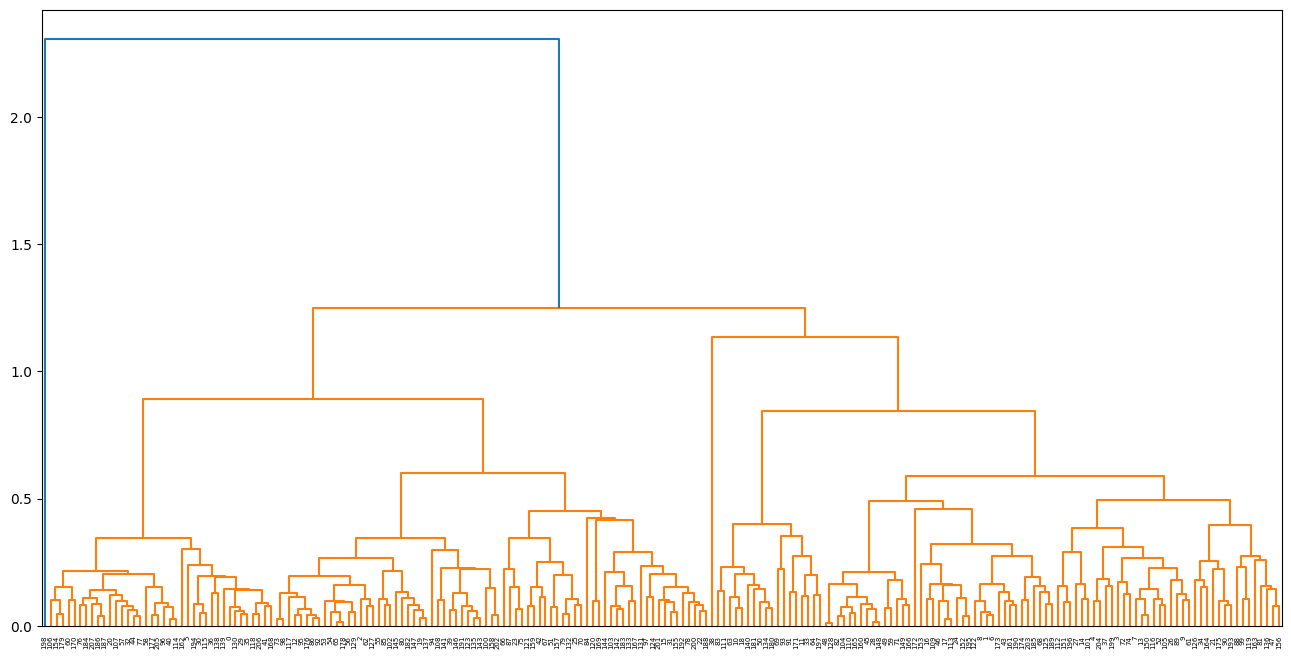

In [48]:
plt.figure(figsize=(16,8))
dendrogram=sch.dendrogram(sch.linkage(pca_df,method='average'))

# Comment:

With average linkage clusters are not interpretable.

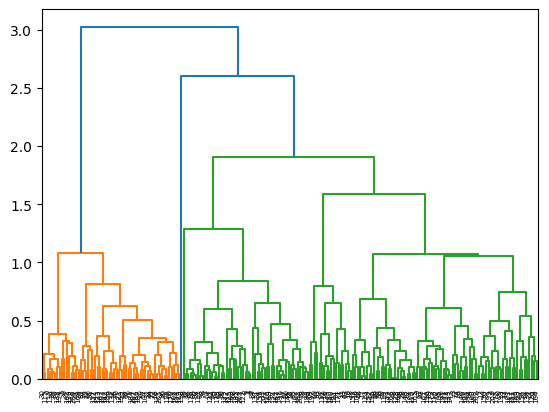

In [49]:
dendrogram=sch.dendrogram(sch.linkage(pca_df,method='complete'))

# Comment:

Complete linkage clusters are also not clear visible therfore ,Using ward linkage

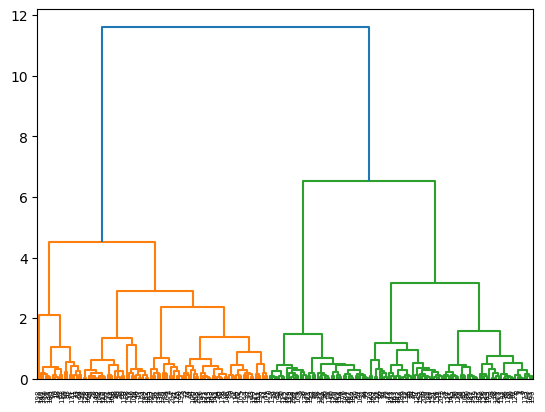

In [50]:
dendrogram=sch.dendrogram(sch.linkage(pca_df,method='ward'))
plt.axhline(y = 80, c = 'red', linestyle = '--')

# Comment:

The dendogram generate from Hierarchical Clustering with ward linkage shows 3 clusters distinctly. Hence 3 clusters are chosen.

In [51]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward').fit(pca_df)

In [52]:
y_hc=hc.fit_predict(pca_df)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [53]:
clusters

,Clusters
0,2
1,1
2,1
3,0
4,0
...,...
203,1
204,0
205,2
206,2


In [54]:
df ['h_clusterid']=clusters

In [55]:
df.sort_values("h_clusterid")

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,h_clusterid
59,0.010846,16579.363636,5209.538462,1.545809e+10,0.054538,639.769231,0.005538,0.584615,78.615385,67.769231,1.053846,0.158692,0.673692,0.167769,1.353502e+06,0.686077,1.217385e+09,6.150769e+08,0
82,0.009615,55609.545455,25813.307692,1.061799e+11,0.078538,834.153846,0.007231,0.430769,77.461538,69.307692,0.938462,0.154462,0.685462,0.160000,1.007392e+07,0.669846,5.256308e+09,2.662846e+09,0
81,0.009769,38617.454545,13773.666667,1.998244e+11,0.068065,1730.502954,0.094738,0.576923,85.384615,79.230769,1.461538,0.140385,0.737154,0.122308,6.877331e+06,1.000000,1.793377e+10,1.484846e+10,0
136,0.014308,33506.000000,17413.076923,1.114798e+11,0.088462,2306.923077,0.005385,0.669231,82.000000,77.846154,0.861538,0.213846,0.662462,0.123615,4.164531e+06,0.860385,4.475154e+09,2.449154e+09,0
178,0.020000,2339.636364,697.000000,2.615180e+09,0.066385,316.000000,0.025385,0.138462,72.692308,66.076923,0.684615,0.295000,0.643462,0.061538,5.030992e+05,0.664923,6.176923e+07,5.453846e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.029000,17.250000,24.750000,1.466402e+09,0.084692,68.230769,0.080692,0.000000,46.000000,45.538462,0.253846,0.391846,0.563615,0.044615,1.946007e+06,0.227154,2.630769e+07,2.449231e+08,2
206,0.043923,2046.363636,7262.250000,1.025046e+10,0.063846,52.461538,0.075692,0.038462,49.692308,48.076923,0.207692,0.465769,0.507231,0.026846,1.190203e+07,0.370769,1.083846e+08,1.083846e+08,2
96,0.038000,9556.454545,16663.916667,2.357826e+10,0.044692,27.923077,0.059231,0.084615,57.461538,54.923077,0.276923,0.429538,0.543615,0.026923,3.693541e+07,0.220769,1.124692e+09,1.802308e+08,2
118,0.047923,571.909091,17533.772251,6.485984e+09,0.064923,33.384615,0.095385,0.000000,51.692308,52.153846,0.253846,0.464538,0.504538,0.030846,1.241884e+07,0.328923,1.848333e+08,1.550000e+08,2


In [56]:
df

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,h_clusterid
0,0.043154,2375.727273,19373.392939,9.718945e+09,0.091909,30.636364,0.082769,0.016667,58.769231,56.384615,0.254545,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.060000e+08,8.240000e+07,2
1,0.014692,3902.090909,2024.583333,8.895522e+09,0.061462,168.846154,0.017769,0.192308,79.230769,73.000000,0.561538,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09,1
2,0.022077,102837.636364,34042.166667,1.190391e+11,0.038462,133.846154,0.027769,0.069231,71.615385,68.384615,0.492308,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08,1
3,0.020500,506.725403,66.595546,1.552486e+09,0.096253,1012.218015,0.017465,0.503438,73.350053,68.299346,0.000000,0.292052,0.639553,0.068333,5.752538e+04,0.880000,2.452522e+08,1.097245e+08,0
4,0.010583,537.636364,14566.993748,2.268380e+09,0.063231,2394.461538,0.003000,0.516667,80.118801,74.070621,0.700000,0.236010,0.658249,0.105799,7.668408e+04,0.897462,6.796118e+08,1.473582e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.016769,98764.272727,43263.750000,7.791354e+10,0.060769,51.692308,0.023154,0.169231,79.538462,70.076923,0.546154,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09,1
204,0.013000,789.360495,8076.278491,2.193521e+09,0.055611,3126.643349,0.004346,0.292308,81.769231,75.538462,0.483333,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.259091e+09,6.480373e+08,0
205,0.034923,19319.090909,6517.833333,2.065261e+10,0.048308,49.000000,0.054769,0.053846,63.076923,60.384615,0.215385,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08,2
206,0.043923,2046.363636,7262.250000,1.025046e+10,0.063846,52.461538,0.075692,0.038462,49.692308,48.076923,0.207692,0.465769,0.507231,0.026846,1.190203e+07,0.370769,1.083846e+08,1.083846e+08,2


In [57]:
from sklearn.metrics import silhouette_score
silhotte_h=silhouette_score(pca_df,clusters)
silhotte_h

0.37658730958434217

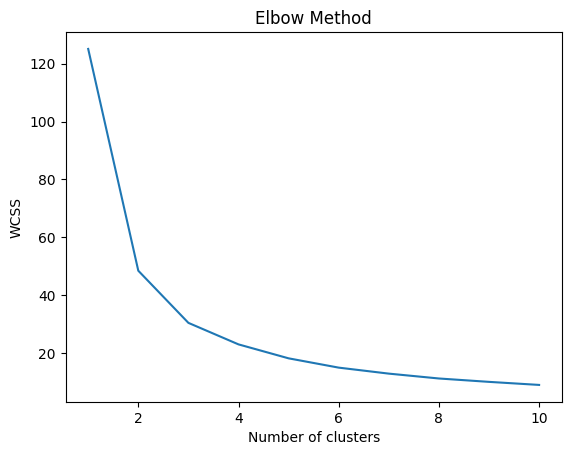

In [58]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
wcss

[125.11835315622862,
 48.47040644505451,
 30.44626439887889,
 23.00913659671185,
 18.18716873402242,
 14.975216121671162,
 12.903301843211638,
 11.223195310760893,
 10.055231194839582,
 8.999854900212242]

In [60]:
clusters_new = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster1=clusters_new.fit(pca_df)

In [61]:
cluster1.labels_

array([1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0,
       1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2,
       0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 2, 0, 1, 0, 0, 2, 1, 1, 1], dtype=int32)

In [62]:
cluster1.cluster_centers_

array([[-0.0963312 , -0.16712386,  0.02859708],
       [ 0.87819827,  0.10193156, -0.00744628],
       [-0.83901535,  0.14063431, -0.03528744]])

<Figure size 1000x800 with 0 Axes>

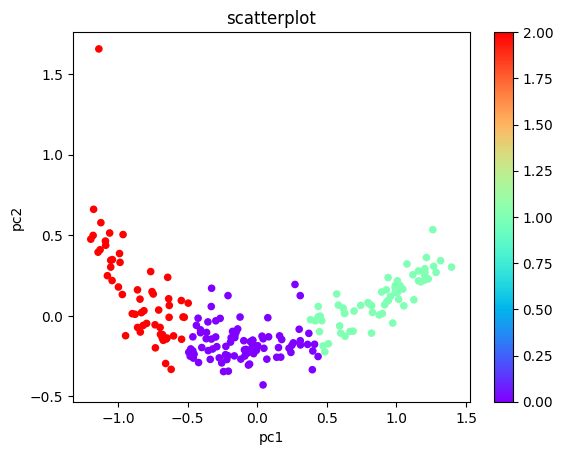

In [63]:
plt.figure(figsize=(10,8))
pca_df.plot(x='PC1',y='PC2',c=clusters_new.labels_,kind='scatter',cmap='rainbow')
plt.title('scatterplot')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [64]:
world3=pd.DataFrame(clusters_new.labels_,columns=['cluster'])


In [65]:
world4=pd.concat([grouped_df,world3],axis=1)

In [66]:
world4

,Country,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,cluster
0,Afghanistan,0.043154,2375.727273,NaN,9.718945e+09,0.091909,30.636364,0.082769,0.016667,58.769231,56.384615,0.254545,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.060000e+08,8.240000e+07,1
1,Albania,0.014692,3902.090909,2024.583333,8.895522e+09,0.061462,168.846154,0.017769,0.192308,79.230769,73.000000,0.561538,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09,0
2,Algeria,0.022077,102837.636364,34042.166667,1.190391e+11,0.038462,133.846154,0.027769,0.069231,71.615385,68.384615,0.492308,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08,0
3,American Samoa,0.020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,5.752538e+04,0.880000,NaN,NaN,0
4,Andorra,0.010583,537.636364,NaN,2.268380e+09,0.063231,2394.461538,0.003000,0.516667,NaN,NaN,0.700000,NaN,NaN,NaN,7.668408e+04,0.897462,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Vietnam,0.016769,98764.272727,43263.750000,7.791354e+10,0.060769,51.692308,0.023154,0.169231,79.538462,70.076923,0.546154,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09,0
204,Virgin Islands (U.S.),0.013000,NaN,NaN,NaN,NaN,NaN,NaN,0.292308,81.769231,75.538462,0.483333,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.259091e+09,NaN,2
205,"Yemen, Rep.",0.034923,19319.090909,6517.833333,2.065261e+10,0.048308,49.000000,0.054769,0.053846,63.076923,60.384615,0.215385,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08,1
206,Zambia,0.043923,2046.363636,7262.250000,1.025046e+10,0.063846,52.461538,0.075692,0.038462,49.692308,48.076923,0.207692,0.465769,0.507231,0.026846,1.190203e+07,0.370769,1.083846e+08,1.083846e+08,1


In [67]:
world4.groupby('cluster').agg('mean')

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
cluster,,,,,,,,,,,,,,,,,,
0,0.018865,138489.390572,53147.921995,1.292831e+11,0.057705,297.087179,0.021312,0.211102,74.934867,69.389657,0.571080,0.281480,0.652216,0.066305,3.589031e+07,0.566541,2.690003e+09,2.054656e+09
1,0.036684,32029.718575,22749.613636,3.185112e+10,0.059259,67.721182,0.066935,0.031087,58.407452,55.792067,0.236133,0.424413,0.542814,0.032762,3.440222e+07,0.347075,3.843832e+08,4.128561e+08
2,0.011763,280078.361081,129412.136885,7.441489e+11,0.080157,2524.698718,0.005527,0.530799,80.978665,75.052153,0.967177,0.178786,0.683185,0.138049,2.138454e+07,0.804159,1.245745e+10,1.254613e+10


In [68]:
cluster_0=world4[world4['cluster']==0].Country.unique()
cluster_0

array(['Albania', 'Algeria', 'American Samoa', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Faeroe Islands',
       'Fiji', 'French Polynesia', 'Georgia', 'Greenland', 'Grenada',
       'Guam', 'Guyana', 'Honduras', 'Indonesia', 'Iran, Islamic Rep.',
       'Isle of Man', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Korea, Dem. Rep.', 'Kosovo', 'Kuwait', 'Kyrgyz Republic',
       'Lebanon', 'Libya', 'Liechtenstein', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Marshall Islands', 'Mauritius', 'Mexico', 'Moldova',
       'Mongolia', 'Morocco', 'Myanmar', 'New Caledonia', 'Nicaragua',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Puerto Rico',
       '

In [69]:
clusters_1=world4[world4['cluster']==1].Country.unique()
clusters_1


array(['Afghanistan', 'Angola', 'Benin', 'Bolivia', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Iraq',
       'Kenya', 'Kiribati', 'Lao PDR', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.',
       'Mozambique', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan',
       'Papua New Guinea', 'Rwanda', 'Samoa', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia',
       'South Sudan', 'Sudan', 'Swaziland', 'Tajikistan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Vanuatu', 'Yemen, Rep.',
       'Zambia', 'Zimbabwe'], dtype=object)

In [70]:
clusters_2=world4[world4['cluster']==2].Country.unique()
clusters_2


array(['Andorra', 'Australia', 'Austria', 'Belgium', 'Bermuda',
       'Bulgaria', 'Canada', 'Cayman Islands', 'Chile', 'Croatia',
       'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong SAR, China',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea, Rep.', 'Latvia', 'Lithuania', 'Luxembourg',
       'Macao SAR, China', 'Malta', 'Monaco', 'Montenegro', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Qatar',
       'Russian Federation', 'San Marino', 'Serbia', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia',
       'Spain', 'St. Martin (French part)', 'Sweden', 'Switzerland',
       'Turks and Caicos Islands', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay',
       'Virgin Islands (U.S.)'], dtype=object)

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer


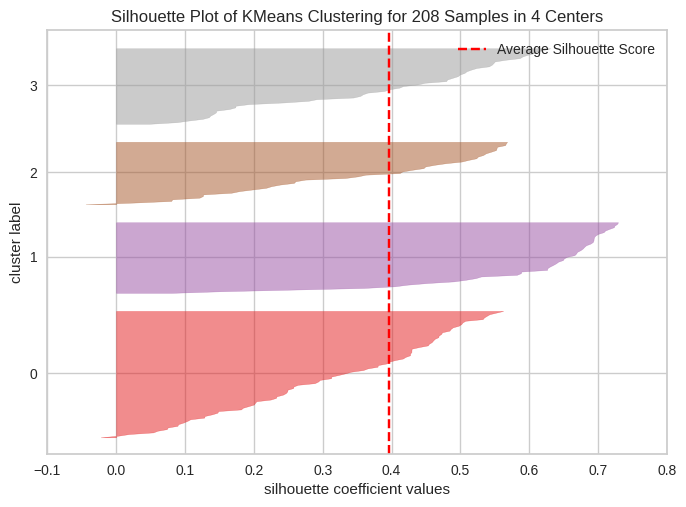

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 208 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
model = SilhouetteVisualizer(KMeans(n_clusters=4))
vis = model.fit(pca_df)
vis.show()

In [73]:
sil_score = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(pca_df)
    sil_score.append(silhouette_score(X_train_minmax,y))
sil_score


[0.4097066737524856,
 0.32488693030598326,
 0.2569026359389088,
 0.23635688511295586,
 0.24979482886805718,
 0.2520500668936726,
 0.2231870966319545,
 0.1747454471782226,
 0.16021579923402726,
 0.1612042564319317,
 0.15945584629118104,
 0.13734325646880727,
 0.14828564712396133,
 0.14546049726213361,
 0.12627145233370513,
 0.11527787209165746,
 0.1334803927261587,
 0.12918259113907865]

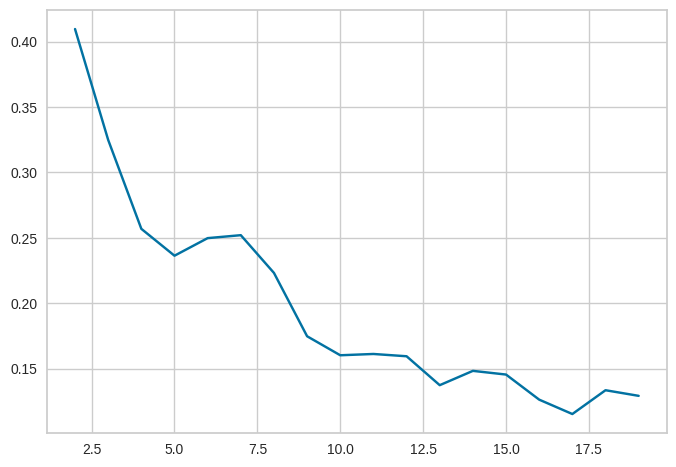

In [74]:
plt.plot(range(2,20),sil_score)

In [75]:
df1=pd.DataFrame(grouped_df["Country"],columns=['Clusters'])

In [76]:
df1=grouped_df["Country"]

In [77]:
df1= pd.concat([df,df1],axis=1)

In [78]:
df1 = df1.drop('h_clusterid', axis=1)

In [79]:
df1

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country
0,0.043154,2375.727273,19373.392939,9.718945e+09,0.091909,30.636364,0.082769,0.016667,58.769231,56.384615,0.254545,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.060000e+08,8.240000e+07,Afghanistan
1,0.014692,3902.090909,2024.583333,8.895522e+09,0.061462,168.846154,0.017769,0.192308,79.230769,73.000000,0.561538,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09,Albania
2,0.022077,102837.636364,34042.166667,1.190391e+11,0.038462,133.846154,0.027769,0.069231,71.615385,68.384615,0.492308,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08,Algeria
3,0.020500,506.725403,66.595546,1.552486e+09,0.096253,1012.218015,0.017465,0.503438,73.350053,68.299346,0.000000,0.292052,0.639553,0.068333,5.752538e+04,0.880000,2.452522e+08,1.097245e+08,American Samoa
4,0.010583,537.636364,14566.993748,2.268380e+09,0.063231,2394.461538,0.003000,0.516667,80.118801,74.070621,0.700000,0.236010,0.658249,0.105799,7.668408e+04,0.897462,6.796118e+08,1.473582e+08,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.016769,98764.272727,43263.750000,7.791354e+10,0.060769,51.692308,0.023154,0.169231,79.538462,70.076923,0.546154,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09,Vietnam
204,0.013000,789.360495,8076.278491,2.193521e+09,0.055611,3126.643349,0.004346,0.292308,81.769231,75.538462,0.483333,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.259091e+09,6.480373e+08,Virgin Islands (U.S.)
205,0.034923,19319.090909,6517.833333,2.065261e+10,0.048308,49.000000,0.054769,0.053846,63.076923,60.384615,0.215385,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08,"Yemen, Rep."
206,0.043923,2046.363636,7262.250000,1.025046e+10,0.063846,52.461538,0.075692,0.038462,49.692308,48.076923,0.207692,0.465769,0.507231,0.026846,1.190203e+07,0.370769,1.083846e+08,1.083846e+08,Zambia


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

In [81]:
X= df1

In [82]:
m = DataFrameMapper([(["Country",LabelEncoder()])])

In [83]:
cluster = []
cluster.append(("mapper",m))
cluster.append(("KMeans",KMeans(n_clusters=3, init='k-means++', random_state=42)))

In [84]:
model= Pipeline(cluster)

In [85]:
model.fit(X)

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['Country', LabelEncoder()]])),
                ('KMeans', KMeans(n_clusters=3, random_state=42))])

In [86]:
labels = model.predict(X)


In [87]:
import pickle
with open(file="cluster.pkl", mode="wb") as f:
    pickle.dump(model, f)